# Configuraciones y adecuación de ambientes de desarrollo
---
## Servicios públicos en Internet.
---
### I. Configuración de GitHub.

1. En el sitio de GitHub, con nuestro usuario, crear un nuevo repositorio público.

![GitHub repositorio](./doc/img/github-repositorio.png)

2. **Adicionar la llave SSH pública (id_rsa.pub) de nuestra usuario en nuestraPC, para poder interactuar con GitHub.**

![GitHub repositorio SSH ID](./doc/img/github-repositorio-ssh-id.png)

### II. Configuración de Google Drive.

En el sitio de Google Drive, con nuestro usuario, crear una nueva carpeta, con permisos de edición para cualquiera que tenga el enlace.

![GitHub repositorio SSH ID](./doc/img/gdrive-carpeta.png)

---
## En nuestro servidor/desktop.
---
### III. Instalar el software necesario.

En nuestro caso utilizamos linux, así que el software necesario consiste en:

- Git server: `zypper in git`
- [Distribución de Anaconda](https://repo.anaconda.com/archive/Anaconda3-2023.09-0-Linux-x86_64.sh)

### IV. Configuración de todo el software.

#### Anaconda

1. Se actualiza nuestro ambiente Anaconda a la última versión disponible.
```shell
(base)> conda update conda
(base)> conda update anaconda
(base)> conda update --all
```
2. Adicionar en Anaconda, un canal o repositorio de software que provea el paquete dvc.
```shell
(base)> conda config --append channels conda-forge
(base)> conda config --show channels
channels:
  - defaults
  - conda-forge
```
3. Creamos el nuevo ambiente para nuestro proyecto: instalamos los últimas versiones de python, dvc, pandas y numpy.
```shell
(base)> conda create -n grp2 python=3.11 pandas numpy matplotlib dvc dvc-gdrive
(base)> conda activate grp2
(grp2)> python --version
Python 3.11.5
(grp2)> conda info
...
```

4. **OPCIONAL** En caso de tener problemas con el ambiente, o cuando el proyecto termine, para eliminar todo el ambiente.
```shell
(grp2)> conda deactivate
(base)> conda remove -n grp2 --all
(base)> conda env list
...
```

#### GIT

1. Se crea la estructura de directorios para nuestro proyecto y se descomprimen los archivos zip.
```shell
mkdir -p ~/desarrollo/python/uagrm/mcdv1e4/fispcd/
cp grp2.zip ~/desarrollo/python/uagrm/mcdv1e4/fispcd/
cd ~/desarrollo/python/uagrm/mcdv1e4/fispcd/
unzip grp2.zip
cd grp2
unzip imgs.zip
rm -f imgs.zip
```
2. Se crea el archivo de excepciones de git, para que git ignore la carpeta dataset, que es donde guardaremos nuestras imágenes en el dataset.
```shell
echo "dataset" > .gitignore
echo "imgs" >> .gitignore
echo ".ipynb_checkpoints" >> .gitignore
```
3. Configuramos la identidad del usuario de git.
```shell
git config --global user.email "oxiel.contreras@gmail.com"
git config --global user.name "Oxiel Contreras"
```
4. Inicializamos el repositorio local git.
```shell
git init
```
5. Se adicionan los archivos de nuestra carpeta y se hace el primer commit localmente.
```shell
git add .
git commit -m "Inicio del proyecto"
```
6. Se configura que este respositorio se sincronizará con GitHub.
```shell
git remote add origin git@github.com:oxielc/uagrm-mcdv1e4-fispcd-grp2.git
```
7. Se procede a sincronizar el repositorio local con GitHub.
```shell
git push origin master
```

#### DVC

1. Se inicializa el respositorio local DVC.
```shell
dvc init
```
2. Se adiciona la carpeta local dataset para que sea gestionada por DVC.
```shell
dvc add dataset
```
3. Se configura el DVC para que pueda replicar los datos locales en Google Drive.
```shell
dvc remote add --default myremote gdrive://1VvoFtu4oyNHl0hrAQL1991D6EC7nh2CP/proyecto-2
```
_En este momento, se solicitará autenticación de Google, con la cuenta que conecta, esto abrirá una ventana del navegador donde se deben registrar las credenciales del usuario._

4. Evitan los errores de seguridad propios de Google Drive.
```shell
dvc remote modify myremote gdrive_acknowledge_abuse true
```
5. Se envían los datos de nuestro dataset local a Google Drive.
```shell
dvc push
```
### V. Desarrollo del proyecto y consideraciones.

Una vez en este punto, ya tenemos configurado todo nuestro ambiente. Git y DVC ya gestionan nuestra carpeta de proyectos y datos, replicando hacia GitHub y Google Drive respectivamente.

- En caso de necesitar hacer un nuevo commit de la data, se lo debe ejecutar así:
```shell
dvc add dataset
dvc push
```

- Y para el código, ejecutar:

```shell
git add .
git commit -m "version 0"
git tag -a v0 -m "version 0"
git push origin master --tags
```


--- Menú ---

Diagnósticos registrados => [ 2 ]

1. Registrar nuevo diagnóstico
2. Modificar un diagnóstico
3. Eliminar un diagnóstico
4. Buscar si existe un diagnóstico
5. Imprimir un diagnóstico
6. Imprimir todo.
7. Salir
Seleccione una opción: 6

Todos los Diagnósticos
----------------------
    CI   Nombre    Diagnostico                   Ruta
0  111  Enrique        La tuca  ./dataset/COVID-2.png
1  333    Chelo  parece q bien  ./dataset/COVID-3.png

--- Menú ---

Diagnósticos registrados => [ 2 ]

1. Registrar nuevo diagnóstico
2. Modificar un diagnóstico
3. Eliminar un diagnóstico
4. Buscar si existe un diagnóstico
5. Imprimir un diagnóstico
6. Imprimir todo.
7. Salir
Seleccione una opción: 1
Ingrese el CI del paciente: 222
Ingrese el nombre del paciente: Alex
Ingrese el diagnóstico del paciente: Esta resfriado
Ingrese la ruta de la imagen: ./imgs/COVID-5.png

 >>> Registro creado correctamente... <<<

--- Menú ---

Diagnósticos registrados => [ 3 ]

1. Registrar nuevo diagnósti

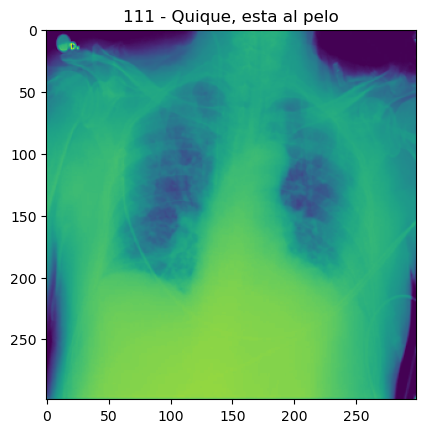


--- Menú ---

Diagnósticos registrados => [ 3 ]

1. Registrar nuevo diagnóstico
2. Modificar un diagnóstico
3. Eliminar un diagnóstico
4. Buscar si existe un diagnóstico
5. Imprimir un diagnóstico
6. Imprimir todo.
7. Salir
Seleccione una opción: 6

Todos los Diagnósticos
----------------------
    CI  Nombre     Diagnostico                   Ruta
0  111  Quique    esta al pelo  ./dataset/COVID-1.png
1  333   Chelo   parece q bien  ./dataset/COVID-3.png
2  222    Alex  Esta resfriado  ./dataset/COVID-5.png

--- Menú ---

Diagnósticos registrados => [ 3 ]

1. Registrar nuevo diagnóstico
2. Modificar un diagnóstico
3. Eliminar un diagnóstico
4. Buscar si existe un diagnóstico
5. Imprimir un diagnóstico
6. Imprimir todo.
7. Salir
Seleccione una opción: 7


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import shutil

class ImagenologiaMedica:
    def __init__(self, ruta_metadata="./metadata.csv", ruta_dataset="./dataset"):
        self.ruta_metadata = ruta_metadata # Ruta al achivo CSV con la metadata
        self.ruta_dataset  = ruta_dataset # Ruta de la carpeta donde se guardan las imagenes

        # Verificar si el archivo existe y no está vacío antes de cargarlo
        if os.path.exists(ruta_metadata) and os.stat(ruta_metadata).st_size > 0:
            self.metadata = pd.read_csv(ruta_metadata)  # Cargar la metadata desde un archivo CSV
        else:
            new_registro = {'CI': [], 'Nombre': [],'Diagnostico': [],'Ruta': []}
            self.metadata = pd.DataFrame(new_registro)  # DataFrame para almacenar la metadata
            print(f"\nEl archivo {ruta_metadata} no existe o esta vacío.")
        self.metadata['CI'] = self.metadata['CI'].astype(str) # Convertir el CI a String

    def validar_imagen(self, ruta_imagen):
        # Verificar si la ruta es un archivo existente y es una imagen
        if os.path.isfile(ruta_imagen) and any(ruta_imagen.lower().endswith(ext) for ext in ('.png', '.jpg', '.jpeg', '.gif')):
            # Obtener el nombre del archivo
            nombre_archivo = os.path.basename(ruta_imagen)
            # Crear la ruta completa de destino
            ruta_destino = os.path.join(self.ruta_dataset, nombre_archivo)
            return ruta_destino  # Retorna la ruta completa del archivo copiado
        else:
            return None  # Retorna None si la ruta no es válida o no es una imagen
            
    def contar_metadata(self):
        return self.metadata.shape[0]

    def buscar_diagnostico(self, ci):
        # Filtrar el DataFrame para encontrar el registro con el CI especificado
        resultado = self.metadata[self.metadata['CI'] == ci]

        # Devolver la respuesta
        if not resultado.empty:
            return True
        else:
            return False
        
    def registrar_diagnostico(self, ci, nombre, diagnostico, ruta_imagen):
        if self.buscar_diagnostico(ci):
            print(f"\n >>> No se puede crear este diagnóstico, el CI {ci} YA existe en el DataSet <<<")
        else:
            ruta_destino = self.validar_imagen(ruta_imagen)
            if ruta_destino == None:
                print(f"\n >>> Imagen NO válida, por favor revise la ruta y el tipo de archivo <<<")
            else:
                new_registro = {'CI': [ci], 'Nombre': [nombre],'Diagnostico': [diagnostico],'Ruta': [ruta_destino]}
                df_temp = pd.DataFrame(new_registro)
                self.metadata = pd.concat([self.metadata, df_temp], ignore_index=True)
                self.metadata.to_csv(self.ruta_metadata, index=False)
                # Copiar el archivo a la carpeta de destino
                shutil.copyfile(ruta_imagen, ruta_destino)
                print("\n >>> Registro creado correctamente... <<<")

    def modificar_diagnostico(self, ci, nombre, diagnostico, ruta_imagen):
        if self.buscar_diagnostico(ci):
            ruta_destino = self.validar_imagen(ruta_imagen)
            if ruta_destino == None:
                print(f"\n >>> Imagen NO válida, por favor revise la ruta y el tipo de archivo <<<")
            else:
                # Buscamos la dirección de la imagen para este registo
                resultado = self.metadata[self.metadata['CI'] == ci]
                primer_fila = resultado.iloc[0]
                imagen_antigua = primer_fila['Ruta']

                self.metadata.loc[self.metadata['CI'] == ci, 'Nombre'] = nombre
                self.metadata.loc[self.metadata['CI'] == ci, 'Diagnostico'] = diagnostico
                self.metadata.loc[self.metadata['CI'] == ci, 'Ruta'] = ruta_destino
                self.metadata.to_csv(self.ruta_metadata, index=False)

                os.remove(imagen_antigua) # borramos el anterior archivo
                shutil.copyfile(ruta_imagen, ruta_destino) # copiamos el archivo a la carpeta
                print("\n >>> Registro modificado correctamente... <<<")
        else:
            print(f"\n >>> No se puede modificar el diagnóstico, este CI {ci} NO existe en el DataSet <<<")
            
    def eliminar_diagnostico(self, ci):
        if self.buscar_diagnostico(ci):
            # Buscamos la dirección de la imagen para este registo
            resultado = self.metadata[self.metadata['CI'] == ci]
            primer_fila = resultado.iloc[0]
            imagen_antigua = primer_fila['Ruta']
            # Eliminamos el registro index del DataFrame
            self.metadata = self.metadata.drop(self.metadata[self.metadata['CI'] == ci].index)
            self.metadata.to_csv(self.ruta_metadata, index=False)
            os.remove(imagen_antigua) # borramos el archivo de imagenes
            print("\n >>> Eliminación correcta... <<<")
        else:
            print(f"\n >>> No se puede eliminar este diagnóstico, el CI {ci} NO existe en el DataSet <<<")
        
    def imprimir_diagnostico(self, ci):
        if self.buscar_diagnostico(ci):
            resultado = self.metadata[self.metadata['CI'] == ci]
            primer_fila = resultado.iloc[0]
            print("\n Impresión del Diagnóstico")
            print("=============================")
            for columna, valor in primer_fila.items():
                print(f"{columna}: {valor}")
            print(f"Graficar la imagen desde: {primer_fila['Ruta']}")
            # Lee la imagen
            img = mpimg.imread(primer_fila['Ruta'])
            plt.imshow(img)
            plt.title(f"{primer_fila['CI']} - {primer_fila['Nombre']}, {primer_fila['Diagnostico']}")
            plt.show()
        else:
            print(f"\n >>> No se puede imprimir este diagnóstico, el CI {ci} NO existe en el DataSet <<<")

    def imprimir_todo(self):
        print("\nTodos los Diagnósticos")
        print("----------------------")
        if self.contar_metadata() > 0:
            print(self.metadata)

# Interacción con el usuario
if __name__ == "__main__":
    ruta_metadata = './metadata.csv'
    ruta_dataset = './dataset'

    modulo_imagenes = ImagenologiaMedica(ruta_metadata, ruta_dataset)

    while True:
        contador = modulo_imagenes.contar_metadata()
        print("\n--- Menú ---")
        print(f"\nDiagnósticos registrados => [ {contador} ]\n")
        print("1. Registrar nuevo diagnóstico")
        print("2. Modificar un diagnóstico")
        print("3. Eliminar un diagnóstico")
        print("4. Buscar si existe un diagnóstico")
        print("5. Imprimir un diagnóstico")
        print("6. Imprimir todo.")
        print("7. Salir")
        opcion = input("Seleccione una opción: ")

        if opcion == '1':
            ci = input("Ingrese el CI del paciente: ")
            nombre = input("Ingrese el nombre del paciente: ")
            diagnostico = input("Ingrese el diagnóstico del paciente: ")
            ruta_imagen = input("Ingrese la ruta de la imagen: ")
            modulo_imagenes.registrar_diagnostico(ci, nombre, diagnostico, ruta_imagen)
        elif opcion == '2':
            ci = input("Ingrese el CI del paciente: ")
            nombre = input("Ingrese el nuevo nombre: ")
            diagnostico = input("Ingrese el nuevo diagnóstico: ")
            ruta_imagen = input("Ingrese la ruta de la nueva imagen: ")
            modulo_imagenes.modificar_diagnostico(ci, nombre, diagnostico, ruta_imagen)
        elif opcion == '3':
            ci = input("Ingrese el CI del diagnóstico a eliminar: ")
            modulo_imagenes.eliminar_diagnostico(ci)
        elif opcion == '4':
            ci = input("Ingrese el CI del paciente: ")
            if modulo_imagenes.buscar_diagnostico(ci):
                print(f"\n >>> El CI {ci} SI existe en el DataSet <<<")
            else:
                print(f"\n >>> El CI {ci} NO existe en el DataSet <<<")
        elif opcion == '5':
            ci = input("Ingrese el CI del paciente: ")
            modulo_imagenes.imprimir_diagnostico(ci)
        elif opcion == '6':
            modulo_imagenes.imprimir_todo()
        elif opcion == '7':
            break
        else:
            print("Opción no válida. Intente de nuevo.")
